In [1]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate_toy as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
reload(clv)
import sys
sys.path.append('../')
sys.path.append('../../code_Boyle')
import Nucleaseq_data_processing as processing
reload(processing)
import read_model_ID_toy as model
reload(model)
import average_data_processing as avg
reload(avg)

<module 'average_data_processing' from 'average_data_processing.pyc'>

In [11]:
filename = 'Enh_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,True,False,True,True)
_, ydatafull, yerrfull = processing.prepare_multiprocessing_combined('1',filename,'../../Data_Boyle/',path_to_data,False)

kclv = []
errclv = []
kon = []
erron = []
i = 1
while i < 20+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            kclv.append(ydata[a][0][0])
            errclv.append(yerr[a][0][0])
            kon.append((ydata[a][1][0]))
            erron.append((yerr[a][1][0]))
            i = i + 1
    
kclv.append(ydata[0][0][0])
kclv = np.array(kclv)
errclv.append(yerr[0][0][0])
errclv = np.array(errclv)
kon.append((ydata[0][1][0]))
kon = np.array(kon)
erron.append(yerr[0][1][0])
erron = np.array(erron)


k_double = np.zeros([20,20])
k_err = np.zeros([20,20])
on_double = np.zeros([20,20])
on_err = np.zeros([20,20])

for a in range(len(xdata)):
    if len(xdata[a])==2:
        i = xdata[a][0]
        j = xdata[a][1]
        k_double[j-1,i-1] = (ydata[a][0][0])
        k_err[j-1,i-1] = yerr[a][0][0]
        if len(ydata[a][1])>0:
            on_double[j-1,i-1] = (ydata[a][1][0])
            on_err[j-1,i-1] = yerr[a][1][0]
        else:
            on_double[j-1,i-1] = np.nan
            on_err[j-1,i-1] = np.nan
        
k_double_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
on_double_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))

In [12]:
kclv_4 = np.zeros(21)
errClv = np.zeros(21)
kon_4 = np.zeros(21)
errOn = np.zeros(21)

#1-7
kclv_4[0:7] = np.average(kclv[0:7],weights=np.reciprocal(errclv[0:7])**2)
kon_4[0:7] = np.average(np.append(kon[0],kon[2:5]),weights=np.reciprocal(np.append(erron[0],erron[2:5])**2))
_, errClv[0:7] = processing.weighting(errclv[0:7])
_, errOn[0:7] = processing.weighting(np.append(erron[0],erron[2:5]))

#8-11
kclv_4[7:11] = np.average(kclv[7:11],weights=np.reciprocal(errclv[7:11])**2)
kon_4[7:11] = np.average(kon[7:11],weights=np.reciprocal(erron[7:11])**2)
_, errClv[7:11] = processing.weighting(errclv[7:11])
_, errOn[7:11] = processing.weighting(erron[7:11])

#12-17
kclv_4[11:17] = np.average(kclv[11:17],weights=np.reciprocal(errclv[11:17])**2)
kon_4[11:17] = np.average(kon[11:17],weights=np.reciprocal(erron[11:17])**2)
_, errClv[11:17] = processing.weighting(errclv[11:17])
_, errOn[11:17] = processing.weighting(erron[11:17])

#18-20
kclv_4[17:20] = np.average(kclv[17:20],weights=np.reciprocal(errclv[17:20])**2)
kon_4[17:20] = np.average(kon[17:20],weights=np.reciprocal(erron[17:20])**2)
_, errClv[17:20] = processing.weighting(errclv[17:20])
_, errOn[17:20] = processing.weighting(erron[17:20])

#OT
kclv_4[20] = kclv[20]
kon_4[20] = kon[20]
errClv[20] = errclv[20]
errOn[20] = erron[20]

In [13]:
#1
tempclv = []
temperrclv = []
for j in range(0,7):
    for i in range(0,j):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(0,7):
    for i in range(0,j):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
#2
tempclv = []
temperrclv = []
for j in range(7,11):
    for i in range(0,7):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(7,11):
    for i in range(0,7):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
#3
tempclv = []
temperrclv = []
for j in range(11,17):
    for i in range(0,7):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(11,17):
    for i in range(0,7):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
#4
tempclv = []
temperrclv = []
for j in range(17,20):
    for i in range(0,7):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(17,20):
    for i in range(0,7):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
#5
tempclv = []
temperrclv = []
for j in range(7,11):
    for i in range(7,j):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(7,11):
    for i in range(7,j):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
#6
tempclv = []
temperrclv = []
for j in range(11,17):
    for i in range(7,11):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(11,17):
    for i in range(7,11):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
#7
tempclv = []
temperrclv = []
for j in range(17,20):
    for i in range(7,11):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(17,20):
    for i in range(7,11):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
#8
tempclv = []
temperrclv = []
for j in range(11,17):
    for i in range(11,j):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(11,17):
    for i in range(11,j):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
#9
tempclv = []
temperrclv = []
for j in range(17,20):
    for i in range(11,17):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(17,20):
    for i in range(11,17):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
#10
tempclv = []
temperrclv = []
for j in range(17,20):
    for i in range(17,j):
        tempclv.append(k_double[j][i])
        temperrclv.append(k_err[j][i])
weights,errclv = processing.weighting(temperrclv)
avgclv = np.average(tempclv,weights=weights)
for j in range(17,20):
    for i in range(17,j):
        k_double[i][j] = avgclv
        k_err[i][j] = errclv
        
        
        
        
        
        
        
        
        
#1
tempon = []
temperron = []
for j in range(2,5):
    for i in range(0,1)+range(2,j):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(0,7):
    for i in range(0,j):
        on_double[i][j] = avgon
        on_err[i][j] = erron
        
        
#2
tempon = []
temperron = []
for j in range(7,11):
    for i in range(0,1)+range(2,5):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(7,11):
    for i in range(0,7):
        on_double[i][j] = avgon
        on_err[i][j] = erron
        
#3
tempon = []
temperron = []
for j in range(11,17):
    for i in range(0,1)+range(2,5):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(11,17):
    for i in range(0,7):
        on_double[i][j] = avgon
        on_err[i][j] = erron
        
#4
tempon = []
temperron = []
for j in range(17,20):
    for i in range(0,1)+range(2,5):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(17,20):
    for i in range(0,7):
        on_double[i][j] = avgon
        on_err[i][j] = erron
        
#5
tempon = []
temperron = []
for j in range(7,11):
    for i in range(7,j):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(7,11):
    for i in range(7,j):
        on_double[i][j] = avgon
        on_err[i][j] = erron
        
#6
tempon = []
temperron = []
for j in range(11,17):
    for i in range(7,11):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(11,17):
    for i in range(7,11):
        on_double[i][j] = avgon
        on_err[i][j] = erron
        
#7
tempon = []
temperron = []
for j in range(17,20):
    for i in range(7,11):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(17,20):
    for i in range(7,11):
        on_double[i][j] = avgon
        on_err[i][j] = erron
        
#8
tempon = []
temperron = []
for j in range(11,17):
    for i in range(11,j):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(11,17):
    for i in range(11,j):
        on_double[i][j] = avgon
        on_err[i][j] = erron
        
#9
tempon = []
temperron = []
for j in range(17,20):
    for i in range(11,17):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(17,20):
    for i in range(11,17):
        on_double[i][j] = avgon
        on_err[i][j] = erron
        
#10
tempon = []
temperron = []
for j in range(17,20):
    for i in range(17,j):
        tempon.append(on_double[j][i])
        temperron.append(on_err[j][i])
weights,erron = processing.weighting(temperron)
avgon = np.average(tempon,weights=weights)
for j in range(17,20):
    for i in range(17,j):
        on_double[i][j] = avgon
        on_err[i][j] = erron

In [14]:
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei'; parnum = '8'
#model_id = 'four_state_model_clv_rates_constant_ei+four_state_model_on_rates_constant_ei_fixPAM'; parnum = '7'
model_id = 'four_state_model_clv_rates+four_state_model_on_rates'; parnum = '27'

filename = 'fit_7_6_2019_sim_8_5.txt'
path = '../../fits_Stijn/7_6_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
T = data.loc[:,'Temperature']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

parameters[3:23] = 5.37
parameters[2] = 0.
parameters[-2] = -0.1
parameters[-1] = 1.

k = np.zeros(21)
on = np.zeros(21)
for i in range(1,21):
    mismatch_positions = [i]
    k[i-1],on[i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
k[-1],on[-1] = np.log10(clv.calc_clv_on(parameters,model_id,[]))

Text(0.5,1,'top = average, bottom = fit')

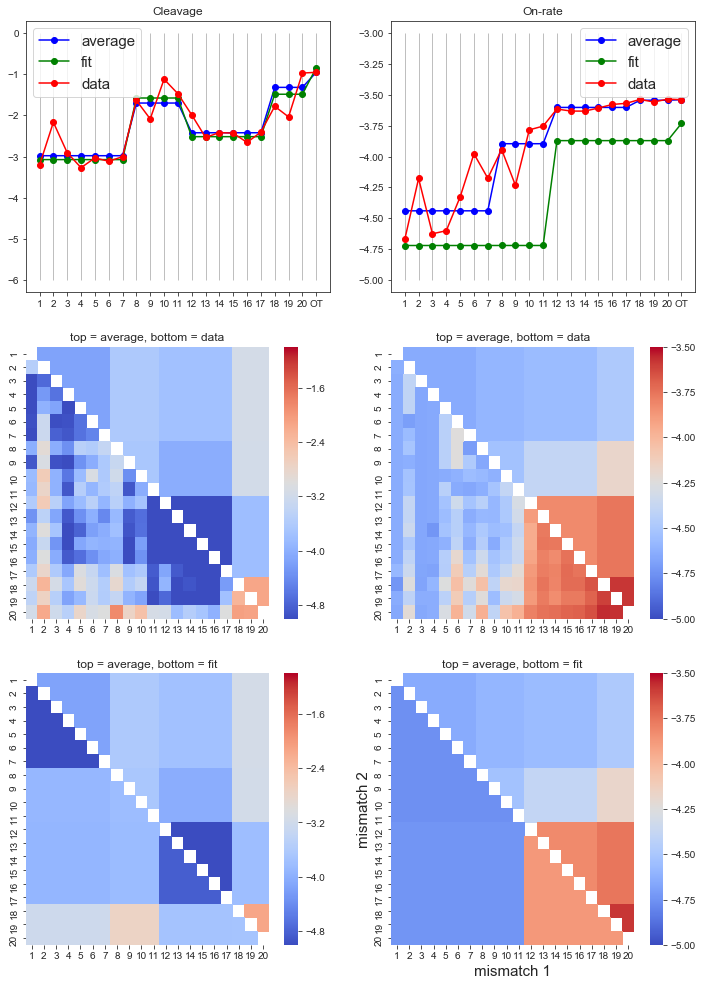

In [15]:
f,ax = plt.subplots(3,2,sharey=False,figsize=[12,17])
    
ax[0][0].plot(range(1,22),kclv_4,marker='o',color='blue')
ax[0][0].plot(range(1,22),k,marker='o',color='green')
ax[0][0].set_xticks(range(1,22));
ax[0][0].set_xticklabels(range(1,21)+['OT'])
ax[0][0].vlines(range(1,22),-6,0,linewidth=0.5,color='grey')
ax[0][0].plot(range(1,22),kclv,marker='o',color='red')
ax[0][0].legend(['average','fit','data'],fontsize=15)
ax[0][0].set_title('Cleavage')

ax[0][1].plot(range(1,22),kon_4,marker='o',color='blue')
ax[0][1].plot(range(1,22),on,marker='o',color='green')
#ax[0][1].errorbar(range(1,22),kon,erron*10,marker='o',color='red')
ax[0][1].set_xticks(range(1,22));
ax[0][1].set_xticklabels(range(1,21)+['OT'])
ax[0][1].vlines(range(1,22),-5,-3,linewidth=0.5,color='grey')
ax[0][1].plot(range(1,22),kon,marker='o',color='red')
ax[0][1].legend(['average','fit','data'],fontsize=15)
ax[0][1].set_title('On-rate')

        
k_df = pd.DataFrame(k_double, index=range(1, 21), columns=range(1, 21))
for i in range(1,21):
    k_df[i].loc[i]=np.nan
    
on_df = pd.DataFrame(on_double, index=range(1, 21), columns=range(1, 21))
for i in range(1,21):
    on_df[i].loc[i]=np.nan
    
sns.heatmap(k_df, cmap='coolwarm', cbar=True,ax=ax[1][0],vmin=-5,vmax=-1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

sns.heatmap(on_df, cmap='coolwarm', cbar=True,ax=ax[1][1],vmin=-5,vmax=-3.5)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

k_double2 = np.zeros([20,20])
on_double2 = np.zeros([20,20])
for i in range(1,20):
    for j in range(i+1,21):
        mismatch_positions = [i,j]
        k_double2[j-1][i-1],on_double2[j-1][i-1] = np.log10(clv.calc_clv_on(parameters,model_id,mismatch_positions))
        
for i in range(1,20):
    for j in range(i+1,21):
        k_double2[i-1][j-1] = k_double[i-1][j-1]
        on_double2[i-1][j-1] = on_double[i-1][j-1]
        
k_df2 = pd.DataFrame(k_double2, index=range(1, 21), columns=range(1, 21))
#k_df2 = k_df2 + k_double_df
for i in range(1,21):
    k_df2[i].loc[i]=np.nan
    
on_df2 = pd.DataFrame(on_double2, index=range(1, 21), columns=range(1, 21))
#on_df2 = on_df2 + on_double_df
for i in range(1,21):
    on_df2[i].loc[i]=np.nan
    
sns.heatmap(k_df2, cmap='coolwarm', cbar=True,ax=ax[2][0],vmin=-5,vmax=-1)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

sns.heatmap(on_df2, cmap='coolwarm', cbar=True,ax=ax[2][1],vmin=-5,vmax=-3.5)
plt.xlabel('mismatch 1', fontsize=15)
plt.ylabel('mismatch 2', fontsize=15)

ax[1][0].set_title('top = average, bottom = data')
ax[1][1].set_title('top = average, bottom = data')
ax[2][0].set_title('top = average, bottom = fit')
ax[2][1].set_title('top = average, bottom = fit')

[[-0.8294520528255691], [-3.539342663677345]]
[[0.0025808017750074126], [0.004679711517006241]]


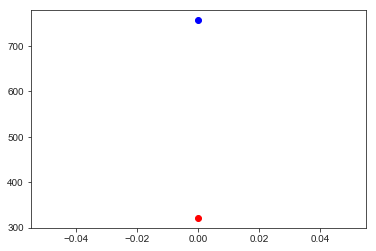

In [24]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../../data_nucleaseq_Finkelsteinlab/targetE/'

xdata_avg,ydata_avg,yerr_avg = avg.combined_average_data('1',filename,'../../Data_Boyle/',path_to_data)

print ydata_avg[0]
print yerr_avg[0]

length = 0
ratioclv = []
ratioon = []
plt.figure()
for i in range(len(xdata_avg)):
    if len(xdata_avg[i])==0:
        length += 1
        ratioclv.append(abs(ydata_avg[i][0][0]/yerr_avg[i][0][0]))
        ratioon.append(abs(ydata_avg[i][1][0]/yerr_avg[i][1][0]))
    
plt.plot(range(length),ratioclv,'ro')
plt.plot(range(length),ratioon,'bo')
    